In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [63]:
df=pd.read_csv('Heart_Disease.csv')

In [64]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [66]:
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [68]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
exer_angina            0.436757
chest_pain             0.433798
old_peak               0.430696
thalach                0.421741
ca                     0.391724
slope                  0.345877
thalassemia            0.344029
gender                 0.280937
age                    0.225439
rest_bps               0.144931
rest_ecg               0.137230
cholestrol             0.085239
fasting_blood_sugar    0.028046
Name: target, dtype: float64


<AxesSubplot:ylabel='target'>

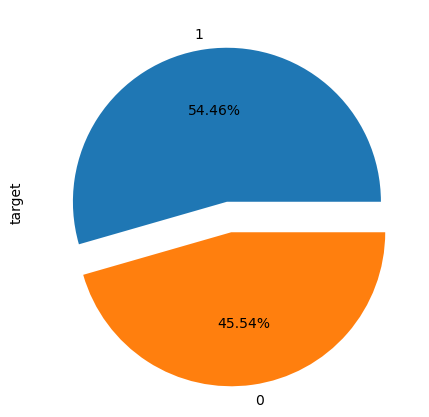

In [6]:
df['target'].value_counts(normalize=True).plot(kind = 'pie',autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='ca'>

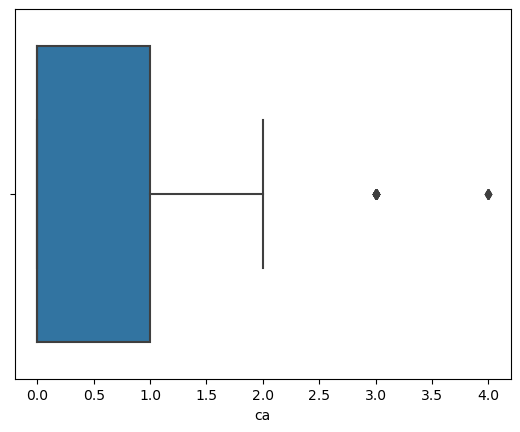

In [8]:
sns.boxplot(x='ca',data=df)

In [9]:
df.shape

(303, 14)

In [10]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

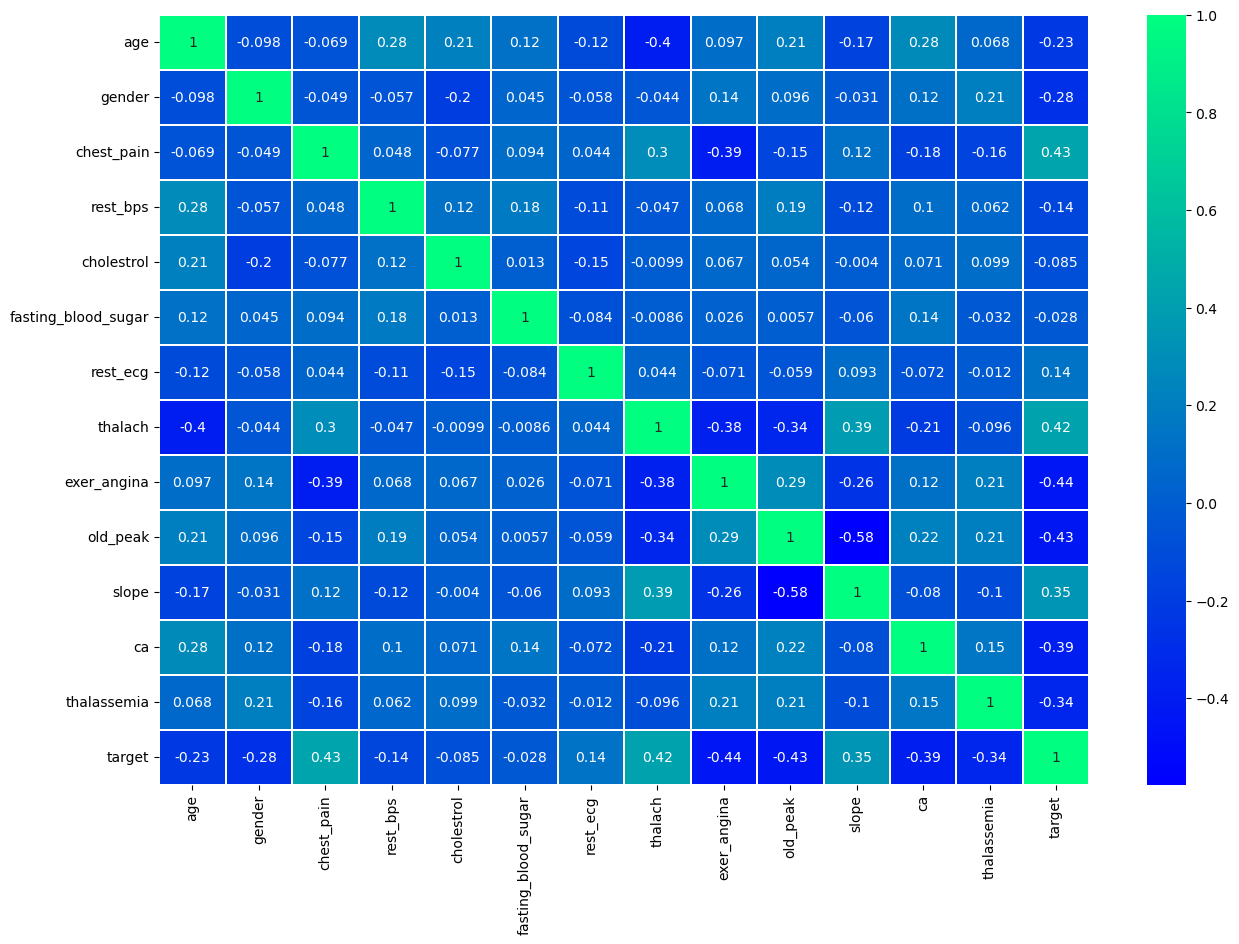

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

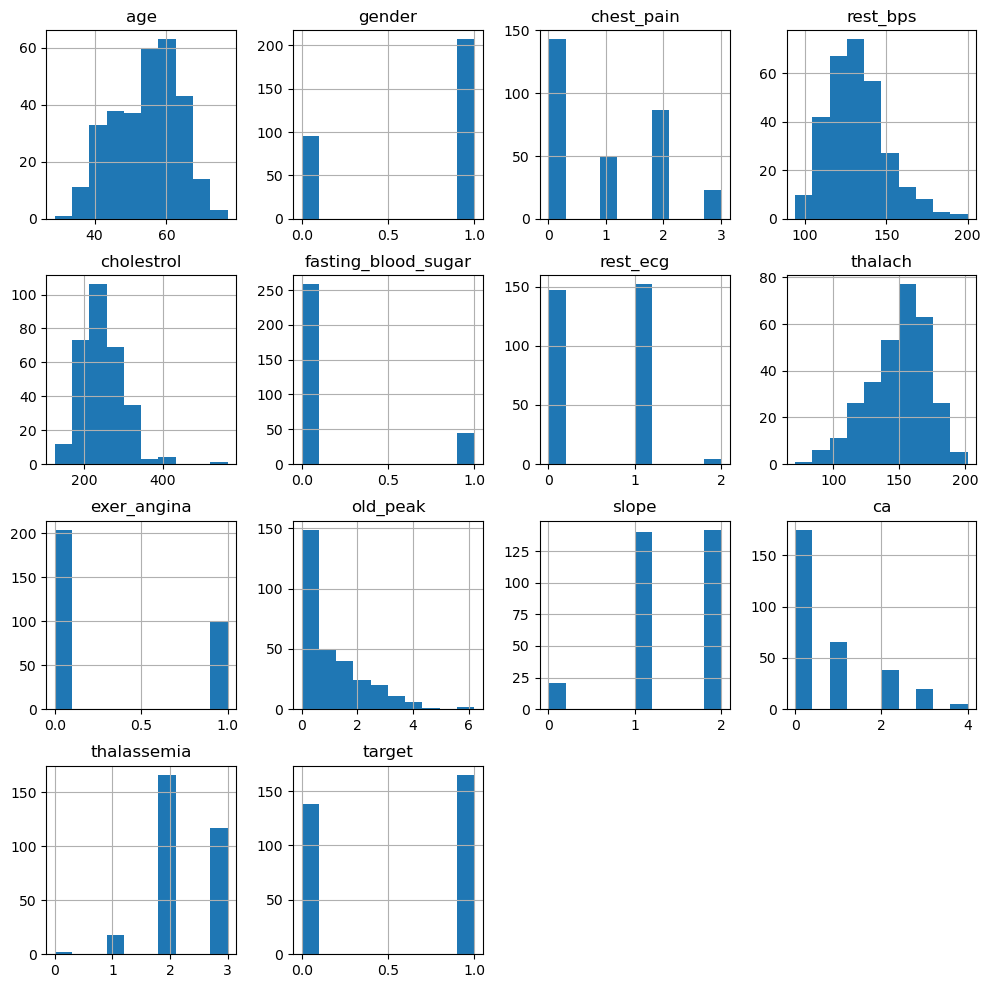

In [12]:
df.hist(figsize=(12,12))
plt.savefig('featuresplot')

<AxesSubplot:xlabel='target', ylabel='age'>

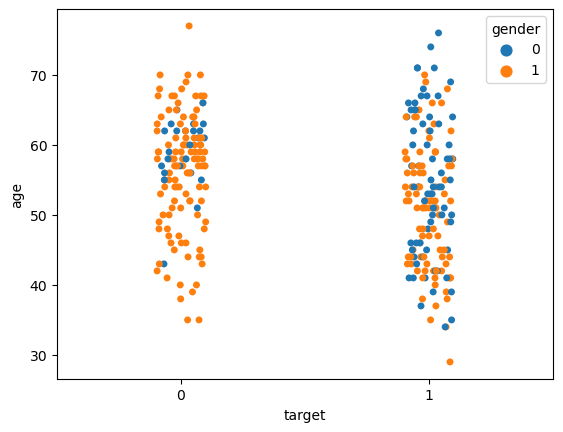

In [13]:
sns.stripplot(x='target',y='age',data=df,hue='gender')

<AxesSubplot:xlabel='target', ylabel='age'>

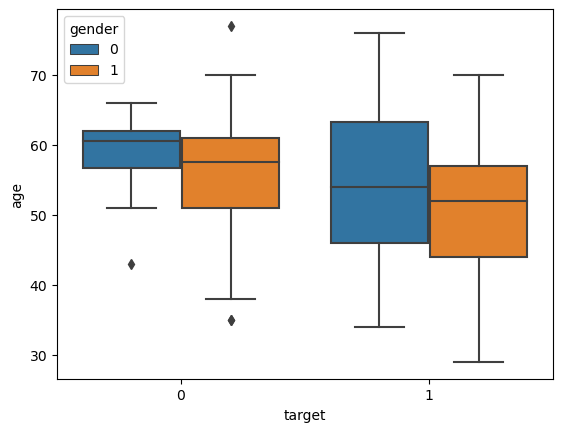

In [14]:
sns.boxplot(x='target',y='age',data=df,hue='gender')

<AxesSubplot:xlabel='chest_pain', ylabel='age'>

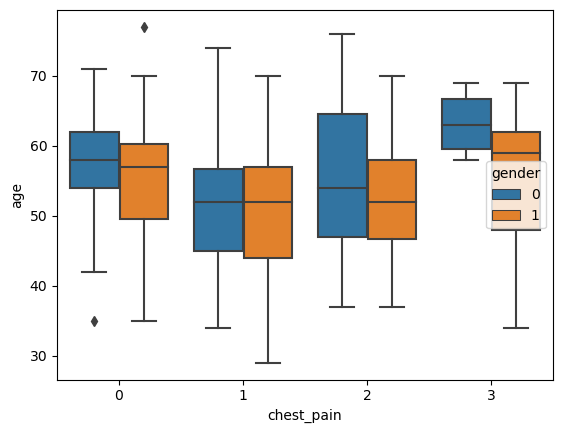

In [15]:
sns.boxplot(x='chest_pain',y='age',data=df,hue='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

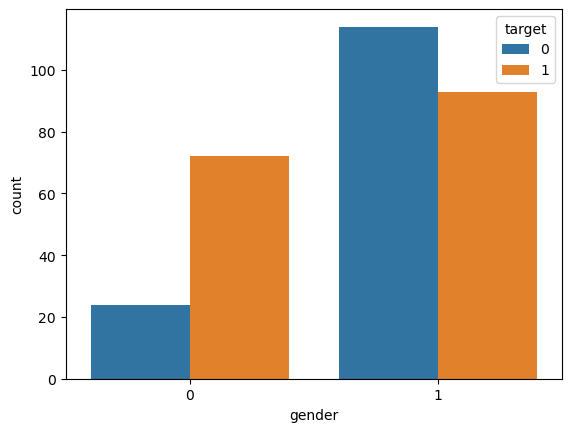

In [16]:
sns.countplot(x='gender',data=df,hue='target')

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

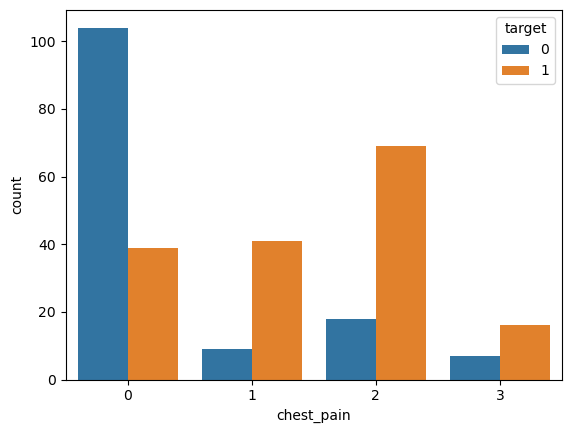

In [17]:
sns.countplot(x='chest_pain',data=df,hue='target')

<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='count'>

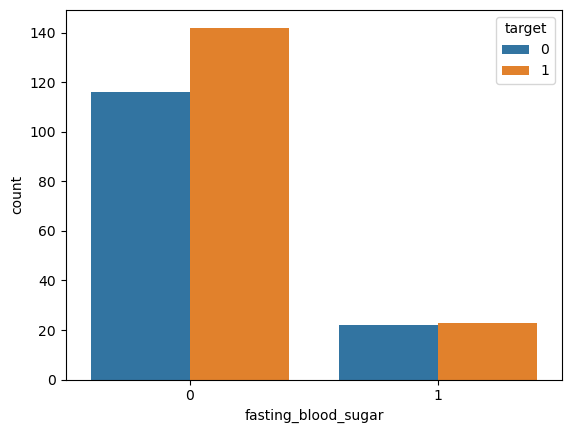

In [18]:
sns.countplot(x='fasting_blood_sugar',data=df,hue='target')

<AxesSubplot:xlabel='slope', ylabel='count'>

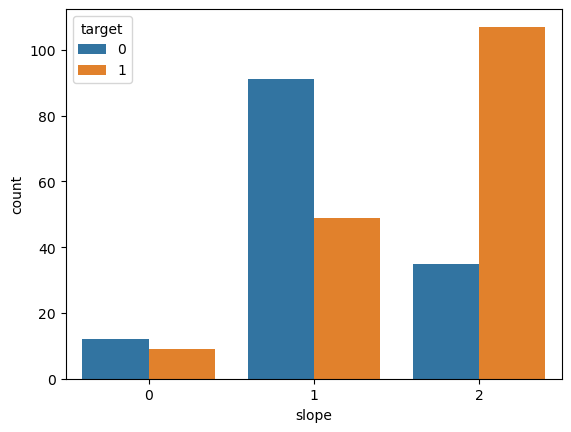

In [19]:
sns.countplot(x='slope',data=df,hue='target')

<AxesSubplot:xlabel='chest_pain', ylabel='age'>

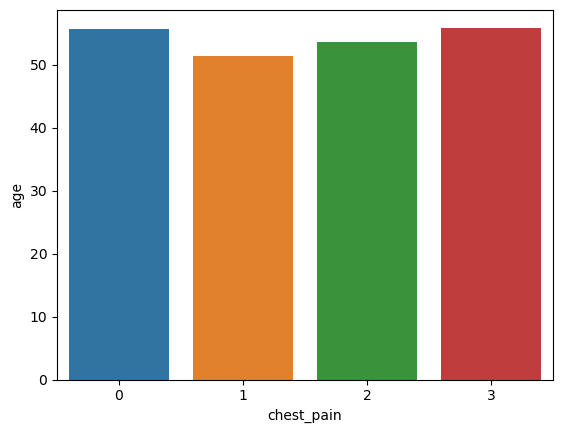

In [20]:
sns.barplot(x='chest_pain',y='age',data=df,ci=None)

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

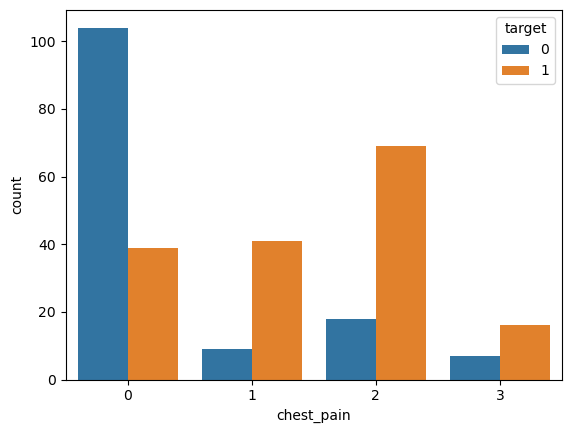

In [21]:
sns.countplot(x='chest_pain',data=df,hue='target')

<AxesSubplot:xlabel='ca', ylabel='count'>

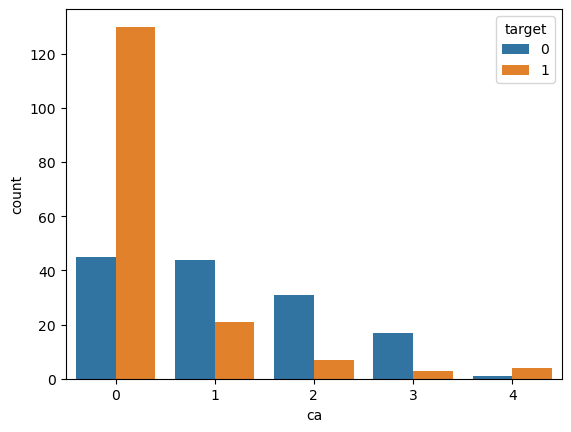

In [22]:
sns.countplot(x='ca',data=df,hue='target')

<AxesSubplot:xlabel='thalassemia', ylabel='count'>

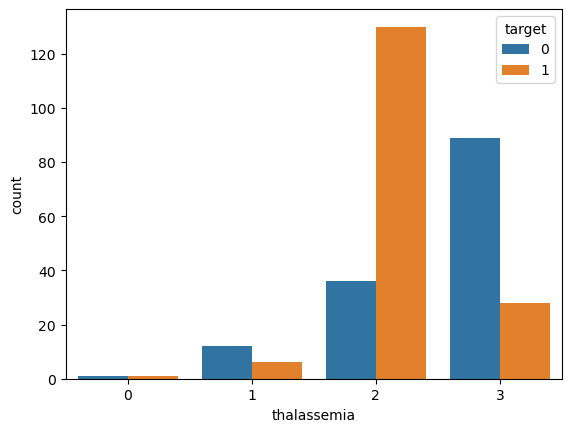

In [23]:
sns.countplot(x='thalassemia',data=df,hue='target')

<AxesSubplot:xlabel='target', ylabel='thalach'>

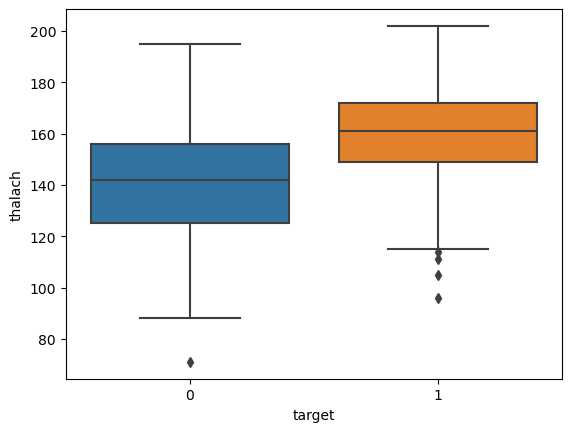

In [24]:
sns.boxplot(x='target',y='thalach',data=df)

<AxesSubplot:xlabel='rest_bps', ylabel='cholestrol'>

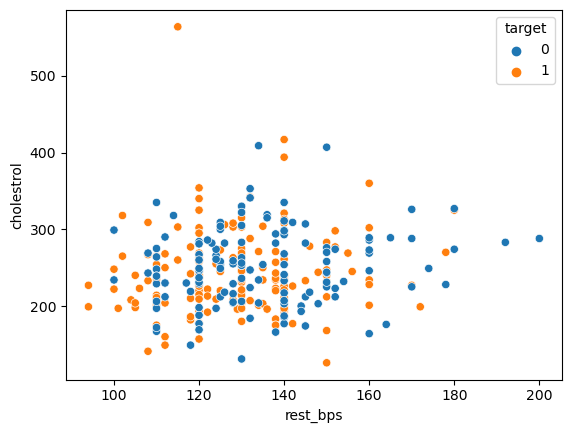

In [25]:
sns.scatterplot(x='rest_bps',y='cholestrol',data=df,hue='target')

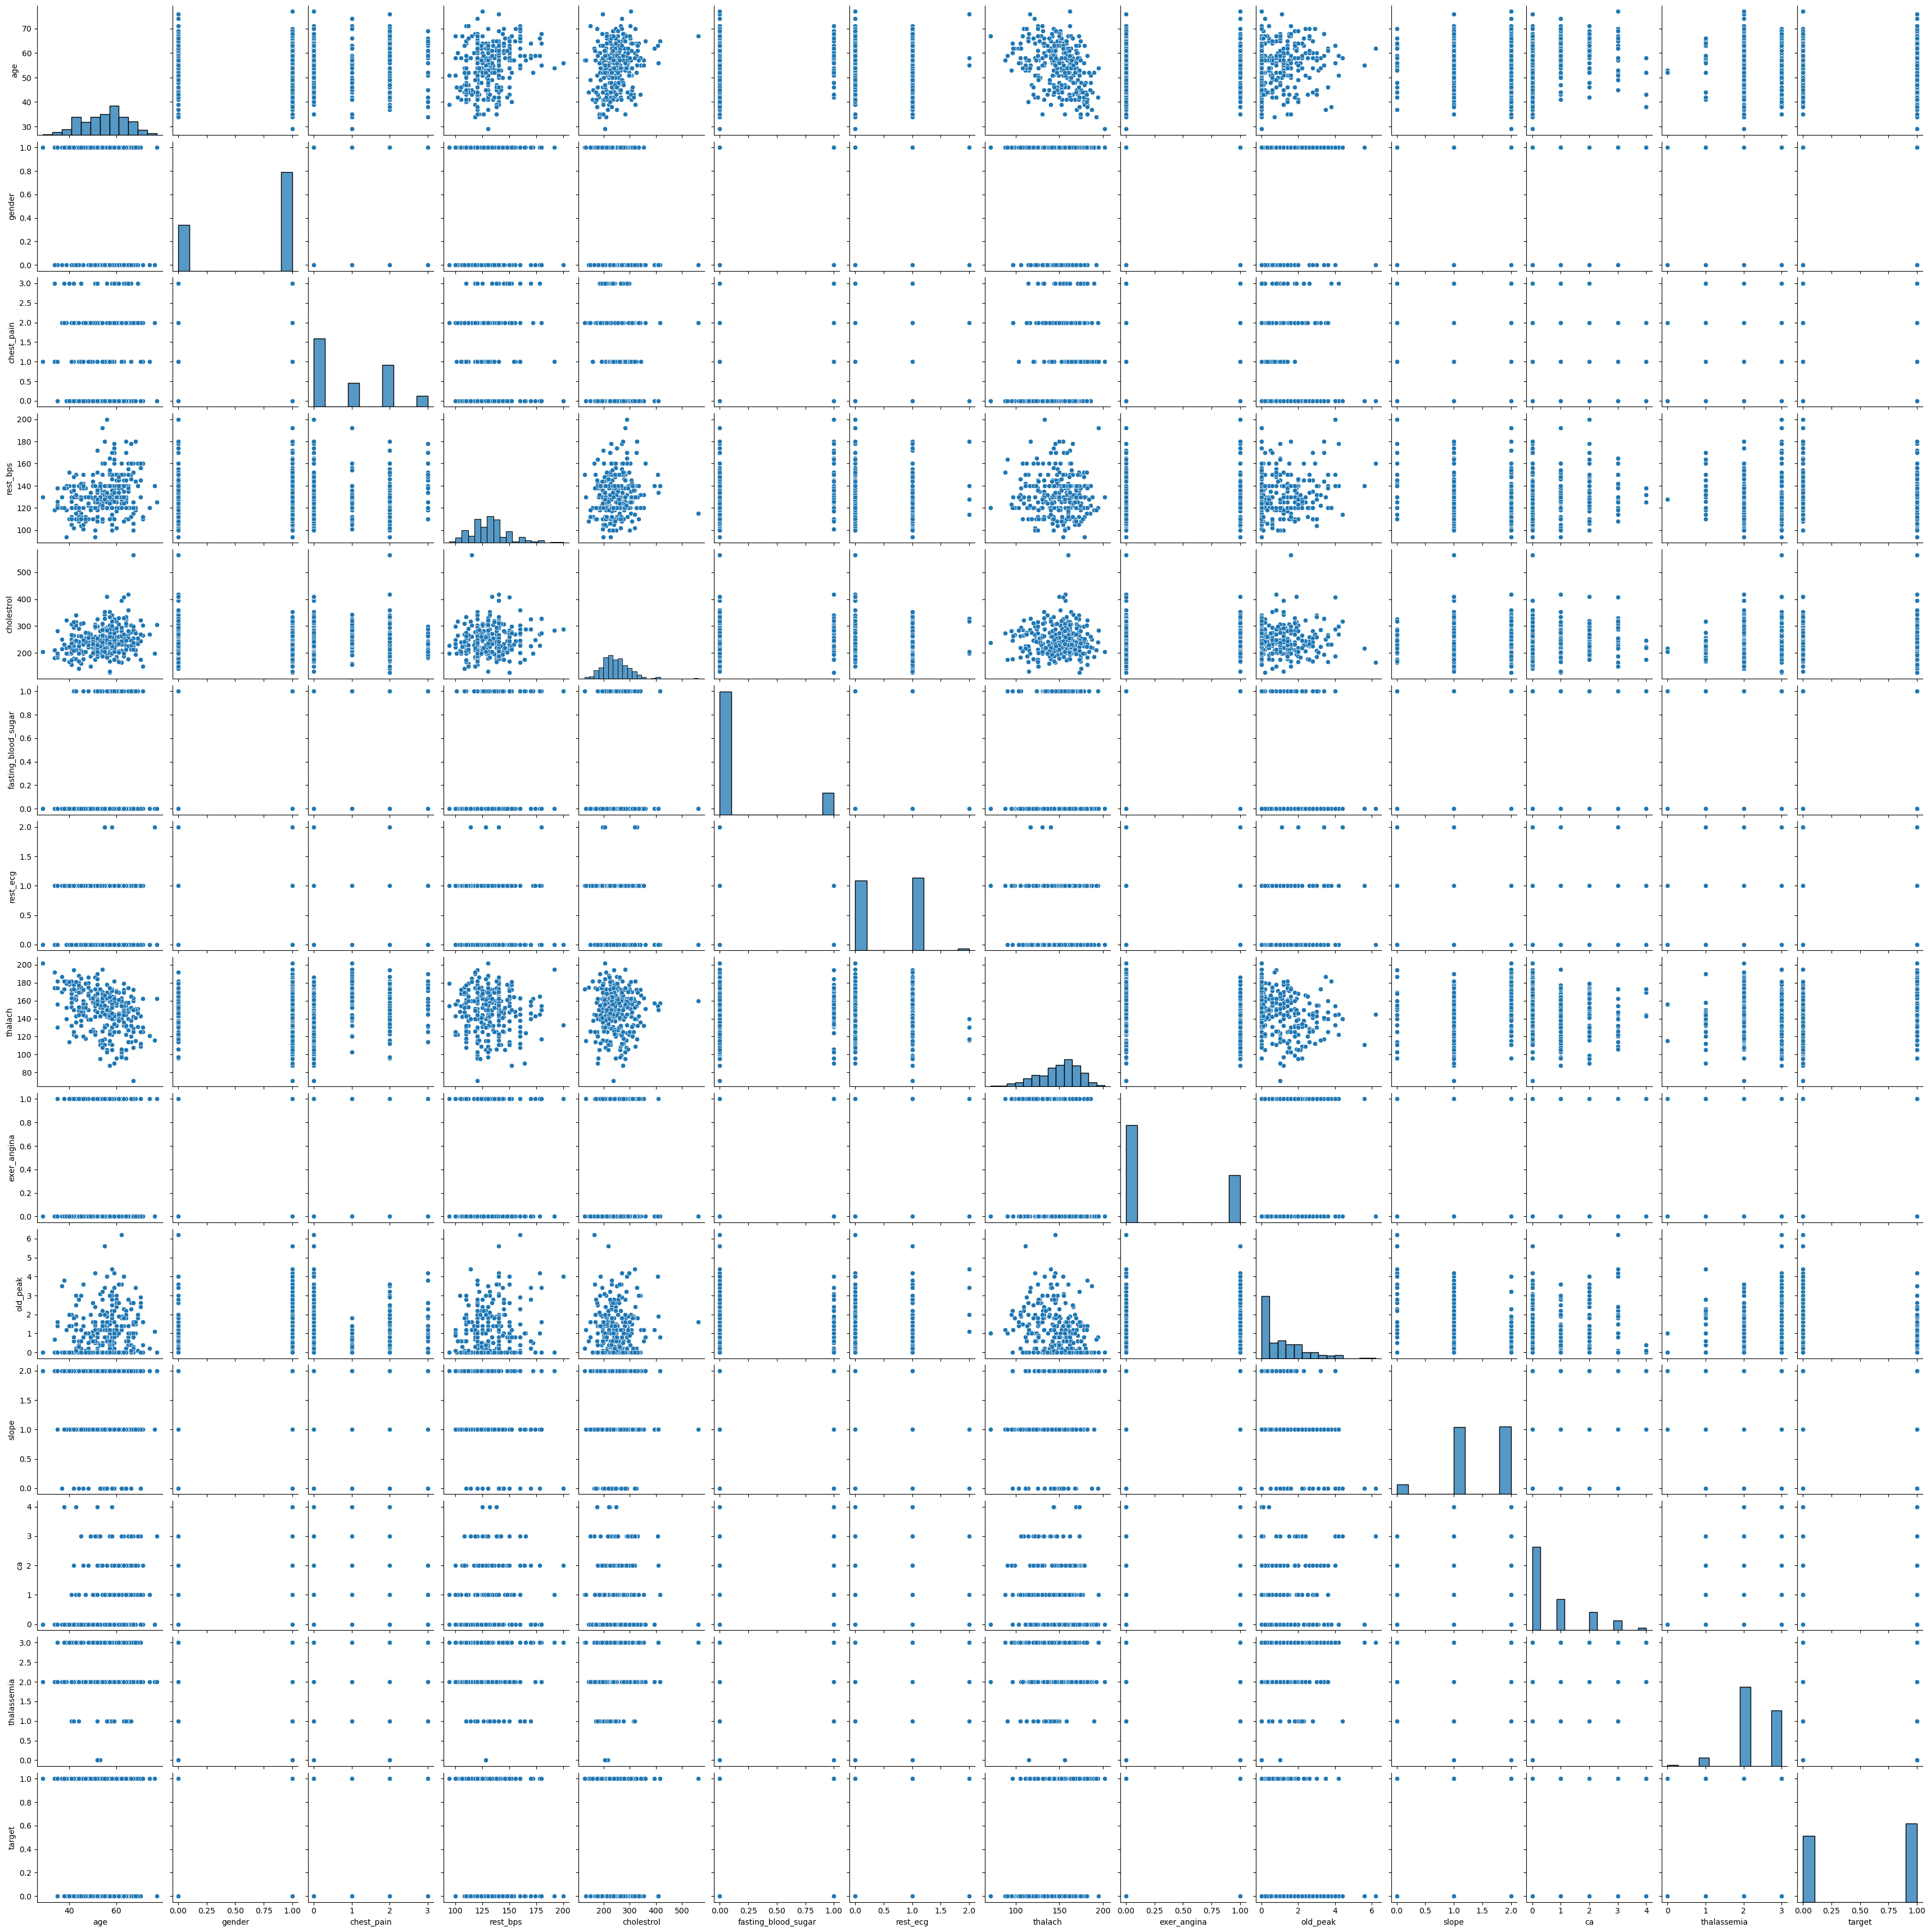

In [26]:
sns.pairplot(data=df)
plt.show()

<AxesSubplot:xlabel='thalach', ylabel='age'>

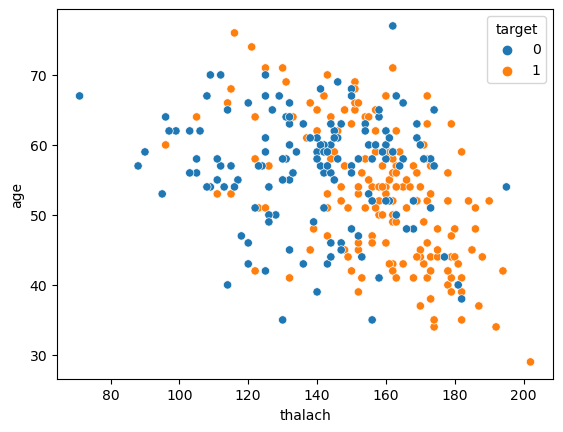

In [27]:
sns.scatterplot(x='thalach',y='age',data=df,hue='target')

In [28]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

<AxesSubplot:xlabel='thalach', ylabel='cholestrol'>

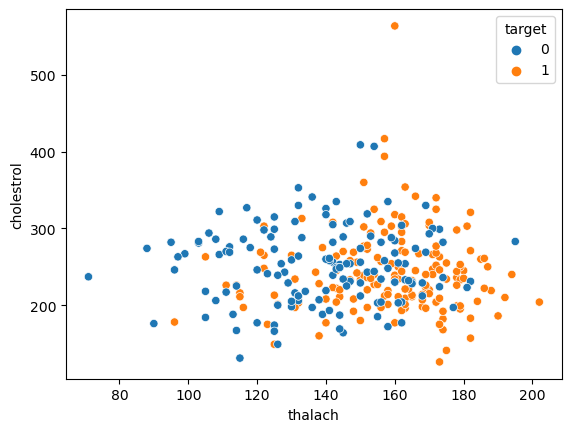

In [29]:
sns.scatterplot(x='thalach',y='cholestrol',data=df,hue='target')

<AxesSubplot:xlabel='target', ylabel='cholestrol'>

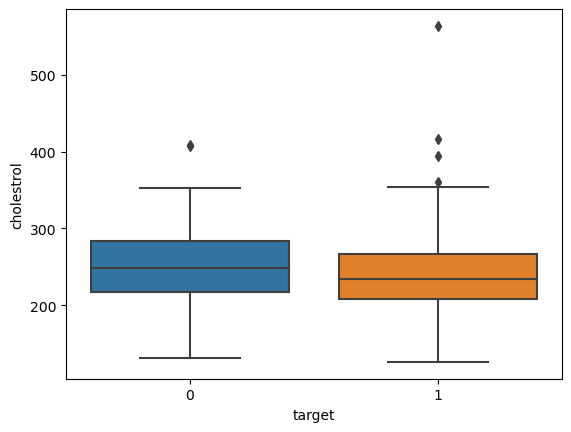

In [30]:
sns.boxplot(x='target',y='cholestrol',data=df)

<AxesSubplot:xlabel='target', ylabel='old_peak'>

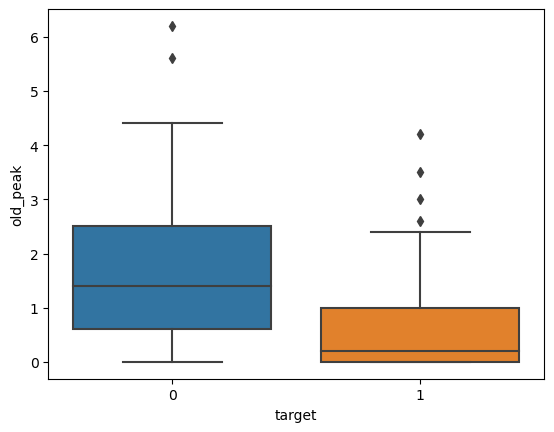

In [31]:
sns.boxplot(x='target',y='old_peak',data=df)

In [32]:
X = df.drop("target", axis=1)

y = df.pop("target")

X.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [35]:
dt_model= DecisionTreeClassifier()

In [36]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

In [37]:
dt_model.score(X_train,train_labels)

1.0

In [38]:
dt_model.score(X_test,test_labels)

0.7252747252747253

In [39]:
train_labels.value_counts(normalize=True)

1    0.542453
0    0.457547
Name: target, dtype: float64

In [40]:
from sklearn import tree

train_char_label = ['No', 'Yes']
pro_Tree_File = open('project_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=pro_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

pro_Tree_File.close()

# This is overfitted model. Model requires regularization

In [41]:
grid={'max_depth':[2,3,4],
      'min_samples_split':[10,20,30],
      'min_samples_leaf':[5,10,15],
      'max_features':[4,6,8]}

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [43]:
model=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=5,n_jobs=-1)

In [44]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30]})

In [45]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 8,
 'min_samples_leaf': 15,
 'min_samples_split': 20}

In [46]:
best_model=grid_search.best_estimator_

In [47]:
best_model.score(X_train,train_labels)

0.8820754716981132

In [48]:
best_model.score(X_test,test_labels)

0.6923076923076923

In [49]:
dt_model=DecisionTreeClassifier(max_depth=3,random_state=1,max_features=4,min_samples_leaf=10,min_samples_split=20)

In [50]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=10,
                       min_samples_split=20, random_state=1)

In [51]:
dt_model.score(X_train,train_labels)

0.8018867924528302

In [52]:
dt_model.score(X_test,test_labels)

0.7692307692307693

In [53]:
dt_model.feature_importances_

array([0.        , 0.04177814, 0.        , 0.        , 0.0590541 ,
       0.        , 0.        , 0.        , 0.52581554, 0.01196974,
       0.07239933, 0.28898315, 0.        ])

In [54]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                          Imp
chest_pain           0.507086
exer_angina          0.208444
ca                   0.125064
age                  0.084257
old_peak             0.065635
thalach              0.009514
gender               0.000000
rest_bps             0.000000
cholestrol           0.000000
fasting_blood_sugar  0.000000
rest_ecg             0.000000
slope                0.000000
thalassemia          0.000000


In [55]:
ytrain_predict=dt_model.predict(X_train)
ytest_predict=dt_model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

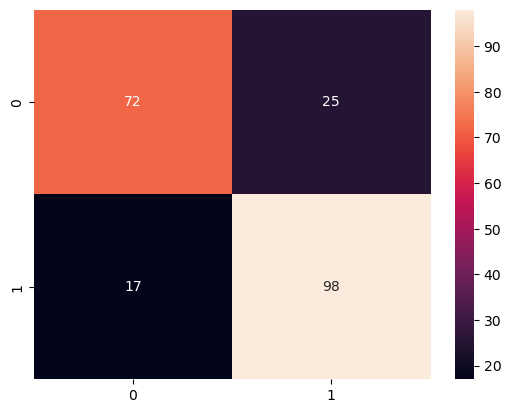

In [57]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='g')

In [58]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        97
           1       0.80      0.85      0.82       115

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212



<AxesSubplot:>

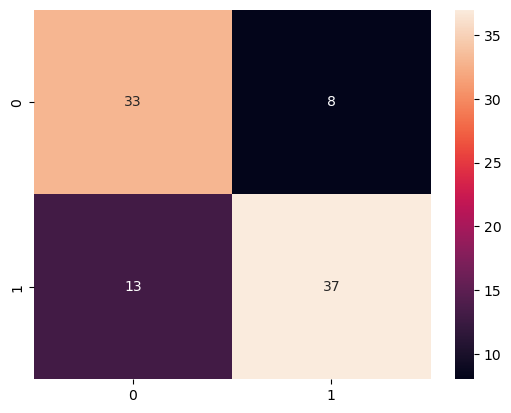

In [59]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='g')

In [60]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.82      0.74      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

